# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Confirmation of GPU

In [24]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [25]:
##Data Preprocessing

### Training Image preprocessing

In [ ]:
# Use the full path to your 'train' folder
path =r'C:\Users\avin\TMI-102\TMI 102 Plant leaf Disease new dataset\train'
training_set = tf.keras.utils.image_dataset_from_directory(path,
    labels="inferred",
    label_mode="categorical", # Corrected this line
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 105874 files belonging to 77 classes.


### Validation Image Preprocessing

In [ ]:
path =r'C:\Users\avin\TMI-102\TMI 102 Plant leaf Disease new dataset\valid'
validation_set = tf.keras.utils.image_dataset_from_directory(path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 47172 files belonging to 77 classes.


In [28]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 77), dtype=tf.float32, name=None))>

In [29]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[171.75    161.75    172.75   ]
   [172.5     162.5     173.5    ]
   [169.75    159.75    170.75   ]
   ...
   [168.75    160.75    171.75   ]
   [171.25    163.25    174.25   ]
   [171.      163.      174.     ]]

  [[167.25    157.25    168.25   ]
   [168.25    158.25    169.25   ]
   [172.5     162.5     173.5    ]
   ...
   [169.5     161.5     172.5    ]
   [170.25    162.25    173.25   ]
   [169.      161.      172.     ]]

  [[171.      161.      172.     ]
   [169.5     159.5     170.5    ]
   [174.5     164.5     175.5    ]
   ...
   [170.5     162.5     173.5    ]
   [174.      166.      177.     ]
   [174.5     166.5     177.5    ]]

  ...

  [[154.5     144.5     152.5    ]
   [162.      152.      160.     ]
   [159.75    149.75    157.75   ]
   ...
   [184.      177.      184.     ]
   [154.25    147.25    154.25   ]
   [182.5     175.5     182.5    ]]

  [[157.5     147.5     155.5    ]
   [162.5     152.5     160.5    ]
   [173.25    163.25    171.25   ]
 

In [30]:
import tensorflow as tf

print("--- Training Set Report ---")
# 1. Check the number of classes and their names
num_classes = len(training_set.class_names)
print(f"✅ Number of Classes: {num_classes}")
print(f"✅ Class Names (first 5): {training_set.class_names[:5]}")

# 2. Check the image shape and batch size from one batch
for images, labels in training_set.take(1):
    print(f"✅ Image Batch Shape: {images.shape}")
    print(f"✅ Labels Batch Shape: {labels.shape}")
    batch_size = images.shape[0]

# 3. Check the total number of images
num_batches = tf.data.experimental.cardinality(training_set).numpy()
num_images = num_batches * batch_size
print(f"✅ Total Batches: {num_batches}")
print(f"✅ Approx. Total Images: {num_images}")

print("\n--- Validation Set Report ---")
val_num_batches = tf.data.experimental.cardinality(validation_set).numpy()
val_num_images = val_num_batches * batch_size
print(f"✅ Approx. Total Images: {val_num_images}")

--- Training Set Report ---
✅ Number of Classes: 77
✅ Class Names (first 5): ['Apple_Fruit___Blotch', 'Apple_Fruit___Normal', 'Apple_Fruit___Rot', 'Apple_Fruit___Scab', 'Apple___Apple_scab']
✅ Image Batch Shape: (32, 128, 128, 3)
✅ Labels Batch Shape: (32, 77)
✅ Total Batches: 3309
✅ Approx. Total Images: 105888

--- Validation Set Report ---
✅ Approx. Total Images: 47200


## Building Model

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that cnn.add unable to capture relevant feature or cnn.add is confusing due to lack of feature so feed with more feature

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Rescaling

In [32]:
model = Sequential([Rescaling(1./255, input_shape=(128, 128, 3))])

### Building Convolution Layer

In [33]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(units=1500,activation='relu'))

In [40]:
model.add(Dropout(0.4)) #To avoid overfitting

In [41]:
#Output Layer
model.add(Dense(units=77,activation='softmax'))

### Compiling and Training Phase

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                      

In [44]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
3309/3309 [==============================] - 256s 77ms/step - loss: 1.8176 - accuracy: 0.4874 - val_loss: 1.1420 - val_accuracy: 0.6957
Epoch 2/10
3309/3309 [==============================] - 242s 73ms/step - loss: 0.6752 - accuracy: 0.7829 - val_loss: 1.0992 - val_accuracy: 0.7857
Epoch 3/10
3309/3309 [==============================] - 245s 74ms/step - loss: 0.4674 - accuracy: 0.8471 - val_loss: 1.1228 - val_accuracy: 0.8319
Epoch 4/10
3309/3309 [==============================] - 249s 75ms/step - loss: 0.3852 - accuracy: 0.8727 - val_loss: 1.0984 - val_accuracy: 0.8352
Epoch 5/10
3309/3309 [==============================] - 338s 102ms/step - loss: 0.3253 - accuracy: 0.8911 - val_loss: 1.1361 - val_accuracy: 0.8667
Epoch 6/10
3309/3309 [==============================] - 190s 57ms/step - loss: 0.2928 - accuracy: 0.9019 - val_loss: 1.0574 - val_accuracy: 0.8710
Epoch 7/10
3309/3309 [==============================] - 191s 58ms/step - loss: 0.2739 - accuracy: 0.9090 - val_loss: 

## Model Evaluation

In [45]:
# Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)


3309/3309 [==============================] - 112s 34ms/step - loss: 0.0881 - accuracy: 0.9694


In [46]:
print(train_loss,train_acc)

0.08810123056173325 0.9693881273269653


In [47]:
# Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)


1475/1475 [==============================] - 30s 20ms/step - loss: 1.3724 - accuracy: 0.8871


In [48]:
print(val_loss,val_acc)

1.3724178075790405 0.8870940208435059


### Saving model

In [49]:
model.save('trained_model.h5')

In [50]:
training_history.history #Return Dictionary of history

{'loss': [1.817557454109192,
  0.6751793622970581,
  0.46744483709335327,
  0.3851696252822876,
  0.32534539699554443,
  0.2927873432636261,
  0.2738782465457916,
  0.25582143664360046,
  0.23798540234565735,
  0.2313518077135086],
 'accuracy': [0.4873717725276947,
  0.7829117774963379,
  0.8471295833587646,
  0.8727355003356934,
  0.8911347389221191,
  0.901930570602417,
  0.9090333580970764,
  0.9149177074432373,
  0.9211704730987549,
  0.9242023825645447],
 'val_loss': [1.142004132270813,
  1.099237322807312,
  1.1227692365646362,
  1.0984171628952026,
  1.1360670328140259,
  1.0573787689208984,
  1.177330732345581,
  1.1935253143310547,
  1.3258283138275146,
  1.3724178075790405],
 'val_accuracy': [0.6956881284713745,
  0.785677969455719,
  0.8318706154823303,
  0.8351988196372986,
  0.8666793704032898,
  0.8709827661514282,
  0.8713855743408203,
  0.881963849067688,
  0.8881539702415466,
  0.8870940208435059]}

In [51]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

In [52]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [53]:
training_history.history['accuracy']

[0.4873717725276947,
 0.7829117774963379,
 0.8471295833587646,
 0.8727355003356934,
 0.8911347389221191,
 0.901930570602417,
 0.9090333580970764,
 0.9149177074432373,
 0.9211704730987549,
 0.9242023825645447]

## Accuracy Visualization

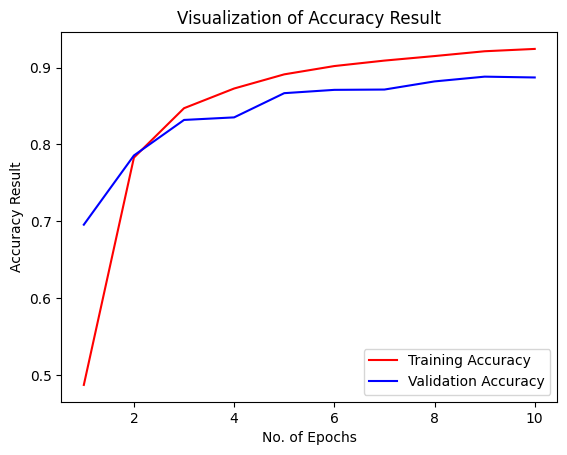

In [54]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [55]:
class_name = validation_set.class_names
class_name

['Apple_Fruit___Blotch',
 'Apple_Fruit___Normal',
 'Apple_Fruit___Rot',
 'Apple_Fruit___Scab',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cauliflower___Black Rot',
 'Cauliflower___Healthy',
 'Cauliflower___Insect Hole',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Guava_Fruit___black_mold',
 'Guava___Wilt',
 'Guava___healthy_leaf',
 'Guava___insect_bite',
 'Guava___multiple',
 'Guava___red_rust',
 'Guava___scorch',
 'Guava_fruit___healthy_fruit',
 'Guava_fruit___scab',
 'Healthy Potatoes',
 'Mango_Fruit___Alternaria',
 'Mango_Fruit___Anthracnose',
 'Mango_Fruit___Black Mould Rot',
 'Mango_Fruit___Hea

In [ ]:
path =r'C:\Users\avin\TMI-102\TMI 102 Plant leaf Disease new dataset\valid'
test_set = tf.keras.utils.image_dataset_from_directory(path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 47172 files belonging to 77 classes.


In [57]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

1475/1475 [==============================] - 31s 21ms/step


(array([[1.30381730e-16, 4.27824178e-20, 2.92471858e-19, ...,
         7.30560385e-19, 1.84949321e-12, 5.02900368e-17],
        [3.09142752e-06, 3.85736563e-08, 4.16013506e-07, ...,
         4.10763437e-11, 1.74467420e-11, 1.59571234e-09],
        [1.30396065e-05, 7.75051467e-06, 2.43592222e-05, ...,
         1.32582008e-08, 1.39946067e-07, 6.61240665e-06],
        ...,
        [1.48434071e-06, 1.19534022e-07, 5.38912827e-05, ...,
         1.33275179e-11, 5.84551400e-17, 3.98500468e-08],
        [3.17933875e-08, 2.98842040e-09, 7.16297350e-08, ...,
         5.94544691e-14, 4.09503703e-17, 3.97345824e-15],
        [1.03092780e-05, 5.06581621e-09, 3.82662074e-06, ...,
         3.49920315e-13, 1.94688749e-16, 1.35308320e-09]], dtype=float32),
 (47172, 77))

In [58]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [59]:
predicted_categories

<tf.Tensor: shape=(47172,), dtype=int64, numpy=array([19, 65, 42, ..., 46, 65, 46], dtype=int64)>

In [60]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(47172, 77), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [61]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(47172,), dtype=int64, numpy=array([58, 52, 68, ..., 65,  4,  2], dtype=int64)>

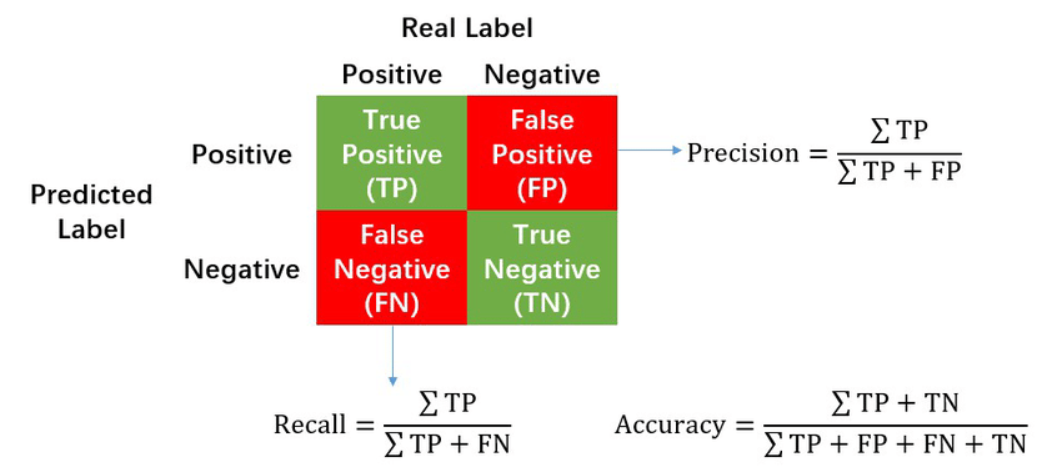

In [62]:
from IPython.display import Image

file_path = r'C:\Users\avin\Pictures\Screenshots\Screenshot 2025-10-20 171602.png'

# Set the width of the image to 800 pixels
Image(filename=file_path, width=800)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print (classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                              Apple_Fruit___Blotch       0.03      0.03      0.03      1187
                              Apple_Fruit___Normal       0.02      0.01      0.01       723
                                 Apple_Fruit___Rot       0.02      0.02      0.02      1187
                                Apple_Fruit___Scab       0.02      0.02      0.02       864
                                Apple___Apple_scab       0.01      0.01      0.01       504
                                 Apple___Black_rot       0.01      0.01      0.01       497
                          Apple___Cedar_apple_rust       0.01      0.01      0.01       440
                                   Apple___healthy       0.02      0.02      0.02       502
                               Blueberry___healthy       0.01      0.01      0.01       454
                           Cauliflower___Black Rot       0.03      0.03      0.

In [65]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[40, 13, 29, ..., 15, 12, 14],
       [16, 10, 20, ..., 12,  9, 10],
       [22, 13, 23, ..., 10, 18,  9],
       ...,
       [15,  7, 14, ...,  7,  4,  1],
       [12,  8, 13, ...,  4,  4,  2],
       [ 8, 10, 11, ...,  4,  4,  5]], dtype=int64)

### Confusion Matrix Visualization

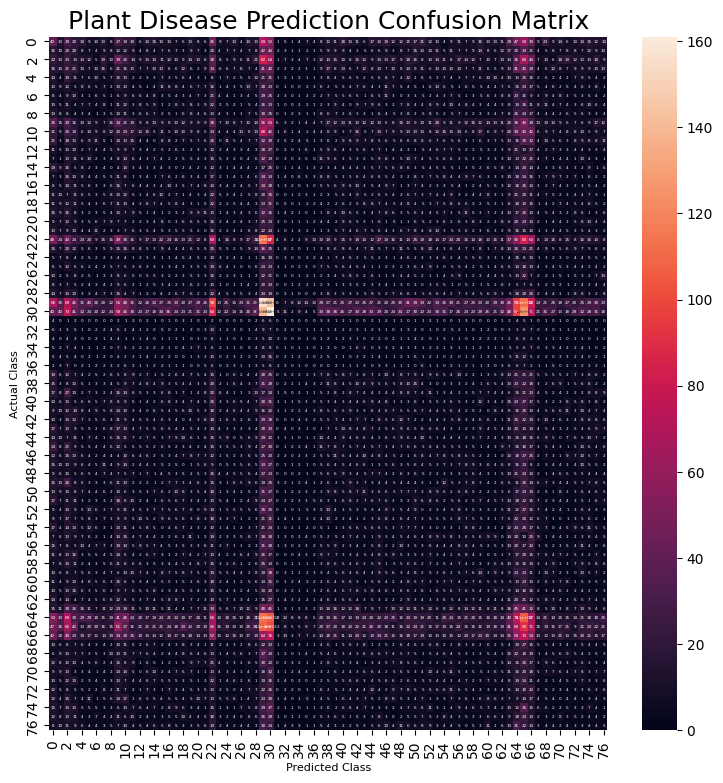

In [71]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,annot_kws={'size':3})
plt.xlabel("Predicted Class", fontsize=8)
plt.ylabel("Actual Class",fontsize=8)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=18)
plt.show()